import libraries

In [1]:
import matplotlib.pylab as plt
import numpy as np

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model

# ニューラルネットワーク

## バイアス

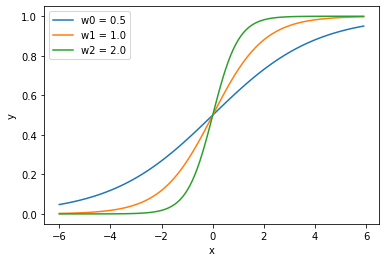

In [3]:
x = np.arange(-6, 6, 0.1)
weights = [0.5, 1.0, 2.0]
for i, w in enumerate(weights):
    f = 1/(1 + np.exp(-x*w)) # sigmoid function
    label = f"w{i} = {w}"
    plt.plot(x, f, label=label)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=2)
plt.show()

バイアスがないと、例えば`y=0.5`でニューロンが発火するとしたとき、いずれも`x=0`で発火することになる（`x>1`の時にのみ発火させる、といった出力ができない）

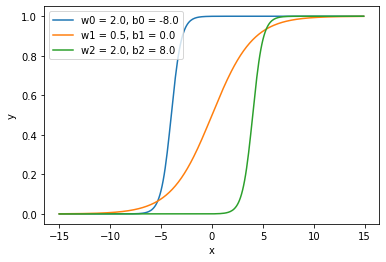

In [11]:
x = np.arange(-15, 15, 0.1)
weights = [2.0, 0.5, 2.0]
biases = [-8.0, 0.0, 8.0]
for i, (w, b) in enumerate(zip(weights, biases)):
    f = 1/(1 + np.exp(-x*w + b)) # sigmoid function
    label = f"w{i} = {w}, b{i} = {b}"
    plt.plot(x, f, label=label)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=2)
plt.show()

## Kerasによる実装

### モデルの定義

#### Sequential model

In [16]:
model = Sequential()
input_layer = Dense(units=32, activation="relu", input_shape=(16,)) # (*,16)の形の入力を受け取ることができる(e.g. (1,16), (32,16))
model.add(input_layer)
output_layer = Dense(units=5, activation="softmax") # (*,5)を出力、*は入力に依存
model.add(output_layer)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________


In [18]:
inputs = np.ones((3,16), dtype=np.float32)
model(inputs)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[0.16493507, 0.05048312, 0.1213552 , 0.5530655 , 0.11016116],
       [0.16493507, 0.05048312, 0.1213552 , 0.5530655 , 0.11016116],
       [0.16493507, 0.05048312, 0.1213552 , 0.5530655 , 0.11016116]],
      dtype=float32)>

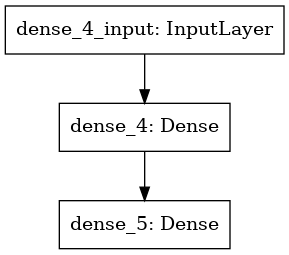

In [19]:
plot_model(model)#, to_file='model.png')

#### Functional API

In [20]:
x = Input(shape=(16,))
h = Dense(units=32, activation="relu")(x)
y = Dense(units=5,  activation="softmax")(h)
model = Model(inputs=[x], outputs=[y])

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________


In [22]:
model(inputs)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[0.10825935, 0.04744397, 0.6368097 , 0.16106378, 0.04642313],
       [0.10825935, 0.04744397, 0.6368097 , 0.16106378, 0.04642313],
       [0.10825935, 0.04744397, 0.6368097 , 0.16106378, 0.04642313]],
      dtype=float32)>

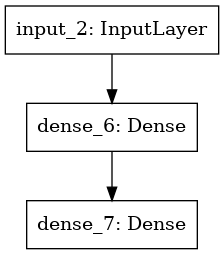

In [23]:
plot_model(model)#, to_file='model.png')

### 損失関数と最適化関数

In [26]:
model.compile(
    loss="sparse_categorical_crossentropy", # 損失関数(e.g. mse, categorical_cross_entropy, ...)
    optimizer="sgd", # 重みの更新に使うアルゴリズム(e.g. sgd, adam, ...)
    metrics=["accuracy"] # 評価に使う指標
)

### コールバック